In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
!pip install uproot
import uproot as ur

plt.rcParams["figure.figsize"] = (10, 8)

In [6]:
from scipy.optimize import curve_fit

def gauss(x, A,mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

In [7]:
path='dd4hep/csv/'
import glob
df = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))

In [109]:
def res_calc(a, fnc=gauss, bins=None):
    a=np.array(a)
    h,x=np.histogram(a, bins=bins)
    bc=(x[1:]+x[:-1])/2
    #eb=plt.errorbar(bc, h, np.sqrt(h), marker='o', ls='', label=label,**eb_args)
    #curve=None
    p0=[10,0, np.std(a[(a>=x[0])&(a<=x[-1])])]
    slc=h>0
    try:
        if len(a[(a>=x[0])&(a<=x[-1])])<100:
            return 0,0
        coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                 sigma=np.sqrt(h[slc]))
        return abs(coeff[2]),np.sqrt(var_matrix[2][2])
    except:
        return 0, 0

['dd4hep/csv/truth_xy_w0_4_3500.csv', 'dd4hep/csv/truth_xy_w0_4_500.csv', 'dd4hep/csv/truth_xy_w0_4_1500.csv', 'dd4hep/csv/truth_xy_w0_4_0.csv', 'dd4hep/csv/truth_xy_w0_4_1000.csv', 'dd4hep/csv/truth_xy_w0_4_3000.csv', 'dd4hep/csv/truth_xy_w0_4_2500.csv', 'dd4hep/csv/truth_xy_w0_4_4000.csv', 'dd4hep/csv/truth_xy_w0_4_4500.csv', 'dd4hep/csv/truth_xy_w0_4_2000.csv']
['dd4hep/csv/truth_xy_w0_5_3500.csv', 'dd4hep/csv/truth_xy_w0_5_500.csv', 'dd4hep/csv/truth_xy_w0_5_1500.csv', 'dd4hep/csv/truth_xy_w0_5_1000.csv', 'dd4hep/csv/truth_xy_w0_5_0.csv', 'dd4hep/csv/truth_xy_w0_5_3000.csv', 'dd4hep/csv/truth_xy_w0_5_2500.csv', 'dd4hep/csv/truth_xy_w0_5_4000.csv', 'dd4hep/csv/truth_xy_w0_5_4500.csv', 'dd4hep/csv/truth_xy_w0_5_2000.csv']
['dd4hep/csv/truth_xy_w0_6_4000.csv', 'dd4hep/csv/truth_xy_w0_6_0.csv', 'dd4hep/csv/truth_xy_w0_6_2500.csv', 'dd4hep/csv/truth_xy_w0_6_2000.csv', 'dd4hep/csv/truth_xy_w0_6_4500.csv', 'dd4hep/csv/truth_xy_w0_6_500.csv', 'dd4hep/csv/truth_xy_w0_6_1500.csv', 'dd4hep/cs

Text(0, 1, '$\\sigma_\\theta$ [mrad]')

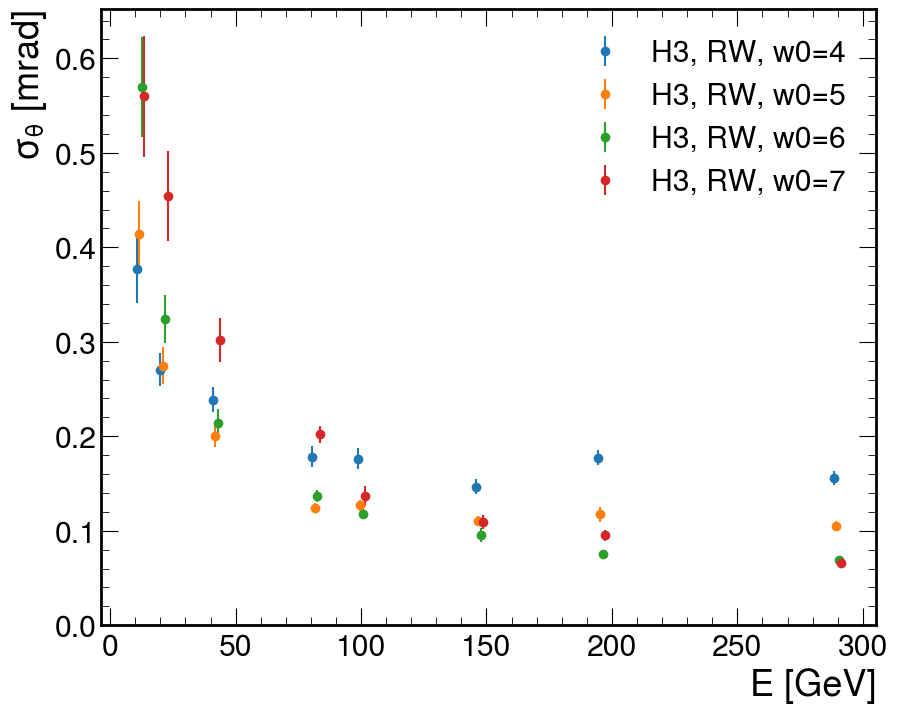

In [85]:
shift=0


for i,w0 in enumerate((4,5,6,7)):
    path=f"dd4hep/csv/truth_xy_w0_{w0}_[0-9]*.csv"
    files=glob.glob(path)
    print(files)
    df = pd.concat(map(pd.read_csv, files))
    
    for rw in True,:
        if i != 0 and rw==False:
            continue
        E_vals=[]
        res_vals=[]
        dres_vals=[]
        for E in 10, 20,40, 80, 100, 150, 200, 300:
            dfq=df.query(f"abs(mc_pz-{E})/mc_pz<.1")
            res, dres =res_calc(dfq.dr if not rw else dfq.dr_rw, bins=np.linspace(-35, 35, 50))
            E_vals.append(np.mean(dfq.mc_pz))
            res_vals.append(res)
            dres_vals.append(dres)
        E_vals=np.array(E_vals)
        
        label=f'H3, RW, w0={w0}'
        plt.errorbar(E_vals+shift, np.array(res_vals)/35, np.array(dres_vals)/35, ls='', marker='o', label=label)
        
        shift+=1
    
#x=np.linspace(10, 300, 300)
#y=np.sqrt((0.69/np.sqrt(x))**2+(4.5/x)**2+0.098**2)
#plt.plot(x,y)
plt.ylim(0)
plt.legend()
plt.xlabel("E [GeV]")
plt.ylabel("$\\sigma_\\theta$ [mrad]")

In [86]:
shift=0


for i,w0 in enumerate((4,5,6,7)):
    path=f"dd4hep/csv/truth_xy_w0_{w0}_[0-9]*.csv"
    files=glob.glob(path)
    print(files)
    df[w0] = pd.concat(map(pd.read_csv, files))
    
    for rw in True,:
        if i != 0 and rw==False:
            continue
        E_vals=[]
        res_vals=[]
        dres_vals=[]
        for E in 10, 20,40, 80, 100, 150, 200, 300:
            dfq=df.query(f"abs(mc_pz-{E})/mc_pz<.1")
            res, dres =res_calc(dfq.dr if not rw else dfq.dr_rw, bins=np.linspace(-35, 35, 50))
            E_vals.append(np.mean(dfq.mc_pz))
            res_vals.append(res)
            dres_vals.append(dres)
        E_vals=np.array(E_vals)
        
        label=f'H3, RW, w0={w0}'
        plt.errorbar(E_vals+shift, np.array(res_vals)/35, np.array(dres_vals)/35, ls='', marker='o', label=label)
        
        shift+=1
    
#x=np.linspace(10, 300, 300)
#y=np.sqrt((0.69/np.sqrt(x))**2+(4.5/x)**2+0.098**2)
#plt.plot(x,y)
plt.ylim(0)
plt.legend()
plt.xlabel("E [GeV]")
plt.ylabel("$\\sigma_\\theta$ [mrad]")

['dd4hep/csv/truth_xy_w0_4_3500.csv', 'dd4hep/csv/truth_xy_w0_4_500.csv', 'dd4hep/csv/truth_xy_w0_4_1500.csv', 'dd4hep/csv/truth_xy_w0_4_0.csv', 'dd4hep/csv/truth_xy_w0_4_1000.csv', 'dd4hep/csv/truth_xy_w0_4_3000.csv', 'dd4hep/csv/truth_xy_w0_4_2500.csv', 'dd4hep/csv/truth_xy_w0_4_4000.csv', 'dd4hep/csv/truth_xy_w0_4_4500.csv', 'dd4hep/csv/truth_xy_w0_4_2000.csv']


/var/folders/_x/mzz2_hcx0dg4mv6b9blzjpp40000gn/T/ipykernel_92322/423237596.py:8: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df[w0] = pd.concat(map(pd.read_csv, files))


ValueError: cannot reindex on an axis with duplicate labels

In [124]:
def fit_res(x,y, dy, fittype="stoch_const_inv",xrange=(10, 300), **arg):
    if fittype=="stoch_only":
        fnc=lambda x, a: a/np.sqrt(x)
        p0=[3]
        coeff, var_matrix = curve_fit(fnc, x, y, p0=p0,
                                     sigma=dy)
        label=f"fit to H3 reweighted:  \n$\\frac{{{coeff[0]:.2f}\pm {np.sqrt(var_matrix[0][0]):.2f}}}{{\\sqrt{{E}}}}$ mrad"
    elif fittype=="stoch_const":
        fnc=lambda x, a,b: np.hypot(a/np.sqrt(x), b)
        p0=[3,4]
        coeff, var_matrix = curve_fit(fnc, x, y, p0=p0,
                                     sigma=dy)
        label=f"fit to H3 reweighted:  \n$\\frac{{{coeff[0]:.2f}\pm {np.sqrt(var_matrix[0][0]):.2f}}}{{\\sqrt{{E}}}}\oplus"+\
                         f"{coeff[1]:.2f}\pm {np.sqrt(var_matrix[1][1]):.2f}$ mrad"
    elif fittype=="stoch_const_inv":
        fnc=lambda x, a,b,c: np.sqrt(a**2/x+b**2+c**2/x**2)
        p0=[3,4,1]
        coeff, var_matrix = curve_fit(fnc, x, y, p0=p0,
                                     sigma=dy)
        label=f"fit to H3 reweighted:  \n$\\frac{{{coeff[0]:.2f}\pm {np.sqrt(var_matrix[0][0]):.2f}}}{{\\sqrt{{E}}}}\oplus"+\
                         f"\\frac{{{coeff[2]:.1f}\pm {np.sqrt(var_matrix[2][2]):.1f}}}{{E}}\oplus"+\
                        f"{coeff[1]:.3f}\pm {np.sqrt(var_matrix[1][1]):.3f}$ mrad"
    x=np.linspace(*xrange, 300)
    plt.plot(x, fnc(x, *coeff), label=label, **arg)

['dd4hep/pkl/truth_xy_w0_range_500.pkl', 'dd4hep/pkl/truth_xy_w0_range_3000.pkl', 'dd4hep/pkl/truth_xy_w0_range_1000.pkl', 'dd4hep/pkl/truth_xy_w0_range_1500.pkl', 'dd4hep/pkl/truth_xy_w0_range_3500.pkl', 'dd4hep/pkl/truth_xy_w0_range_2000.pkl', 'dd4hep/pkl/truth_xy_w0_range_0.pkl', 'dd4hep/pkl/truth_xy_w0_range_4500.pkl', 'dd4hep/pkl/truth_xy_w0_range_4000.pkl', 'dd4hep/pkl/truth_xy_w0_range_2500.pkl']
Index(['E', 'dr', 'dy', 'dx', 'mc_pz', 'x_truth', 'y_truth', 'dr_rw', 'dx_rw',
       'dy_rw',
       ...
       'dy_rw_w0_5pt75', 'dy_rw_w0_6pt0', 'dy_rw_w0_6pt25', 'dy_rw_w0_6pt5',
       'dy_rw_w0_6pt75', 'dy_rw_w0_7pt0', 'dy_rw_w0_7pt25', 'dy_rw_w0_7pt5',
       'dy_rw_w0_7pt75', 'dy_rw_w0_8pt0'],
      dtype='object', length=178)


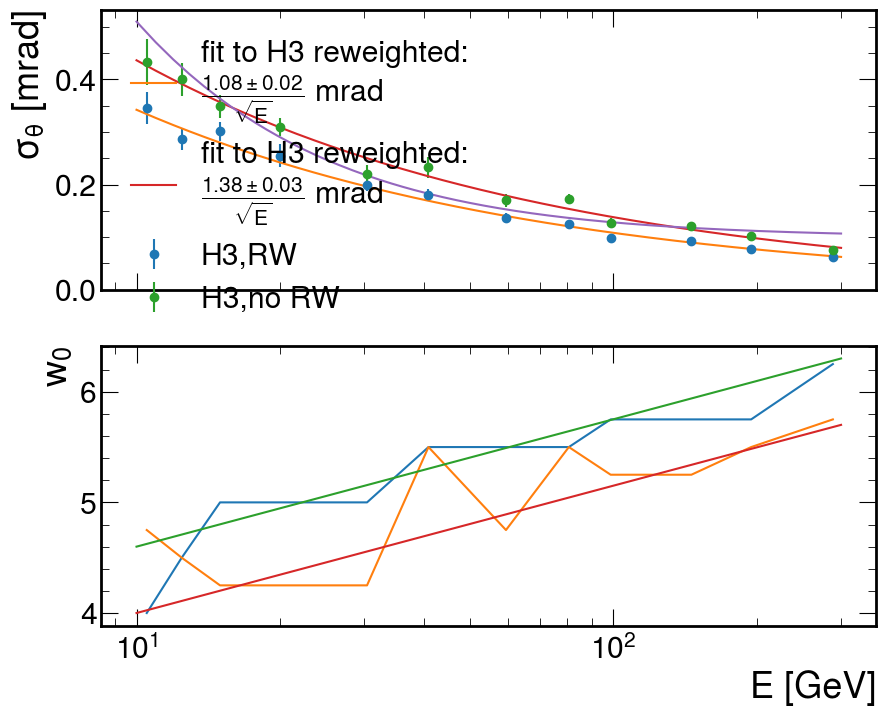

In [135]:
shift=0

path=f"dd4hep/pkl/truth_xy_w0_range_[0-9]*.pkl"
files=glob.glob(path)
print(files)
df = pd.concat(map(pd.read_pickle, files))
print(df.columns)
   
fig, axs=plt.subplots(2,1, sharex='all')
for rw in True,False:
    
    E_vals=[]
    res_vals=[]
    dres_vals=[]
    w0_bests=[]
    for E in 10, 12.5, 15, 20,30, 40, 60, 80, 100, 150, 200, 300:
        dfq=df.query(f"abs(mc_pz-{E})/mc_pz<.1")
        res,dres=1000, 1000
        w0_best=-1
        for i,w0 in enumerate(np.linspace(3.5,8.0, 19)):
            
            field = f'dr_rw_w0_{w0}'.replace(".", "pt")
            if not rw:
                field=field.replace("rw_", "")
            res_tmp, dres_tmp =res_calc(dfq[field], bins=np.linspace(-35, 35, 50))
            if res>res_tmp and res_tmp>0:
                res=res_tmp;dres=dres_tmp
                w0_best=w0
        E_vals.append(np.mean(dfq.mc_pz))
        res_vals.append(res)
        dres_vals.append(dres)
        w0_bests.append(w0_best)
    E_vals=np.array(E_vals)

    label=f'H3,' + ("RW" if rw else "no RW")
    axs[0].errorbar(E_vals, np.array(res_vals)/35, np.array(dres_vals)/35, ls='', marker='o', label=label)
    axs[1].plot(E_vals, w0_bests)
    shift+=1
    plt.sca(axs[0])
    fit_res(E_vals, np.array(res_vals)/35, np.array(dres_vals)/35, "stoch_only")
#x=np.linspace(10, 300, 300)
#y=np.sqrt((0.69/np.sqrt(x))**2+(4.5/x)**2+0.098**2)
#plt.plot(x,y)
#plt.ylim(0, 0.6)
#plt.legend()

x=np.linspace(10, 300, 300)
y=np.sqrt((0.69/np.sqrt(x))**2+(4.5/x)**2+0.098**2)
axs[0].plot(x,y)

axs[0].set_ylabel("$\\sigma_\\theta$ [mrad]")
axs[1].set_ylabel("$w_0$")
axs[1].set_xlabel("E [GeV]")
axs[0].set_xscale('log')
axs[0].set_ylim(0)
axs[0].legend()

x=np.linspace(10, 300, 100)
axs[1].plot(x, 4.6+0.5*np.log(x/10))
axs[1].plot(x, 4.0+0.5*np.log(x/10))

In [11]:
31.3/np.sqrt(24)/35

0.18254530702169877

In [13]:
for fname in "dd4hep/mip.csv", "dd4hep/mip_bug.csv":
    df=pd.read_csv(fname)

    res, dres =res_calc(df.dr_rw, bins=np.linspace(-35, 35, 50))
    print(res, dres)

5.482731338358956 0.15577545623754013
5.5776721700428284 0.1055807827735573


In [14]:
from scipy.optimize import curve_fit

def gauss(x, A,mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

def res_plot(a, fnc=gauss, bins=None, label=None, unit=" mm", legend=True, eb_args={}, fitcurve_args={}):
    a=np.array(a)
    h,x=np.histogram(a, bins=bins)
    bc=(x[1:]+x[:-1])/2
    eb=plt.errorbar(bc, h, np.sqrt(h), marker='o', ls='', label=label,**eb_args)
    curve=None
    p0=[10,0, np.std(a[(a>=x[0])&(a<=x[-1])])]
    slc=h>0
    try:
        coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                 sigma=np.sqrt(h[slc]))
        print(f"fit: $\\sigma={coeff[2]:.1f}\\pm{np.sqrt(var_matrix[2][2]):.1f}${unit}")
        x=np.linspace(x[0], x[-1], 100)
        if coeff[2]< 1000 and var_matrix[2][2]<1000:
            curve=plt.plot(x, fnc(x,*coeff), label=f"fit: $\\sigma={abs(coeff[2]):.1f}\\pm {np.sqrt(var_matrix[2][2]):.1f}${unit}",
                          **fitcurve_args)
        if legend:
            plt.legend(loc='upper left', fontsize=20)
        return coeff[2],np.sqrt(var_matrix[2][2]), eb, curve
    except:
        return 0, 0, eb, None

fit: $\sigma=18.6\pm0.9$ mm


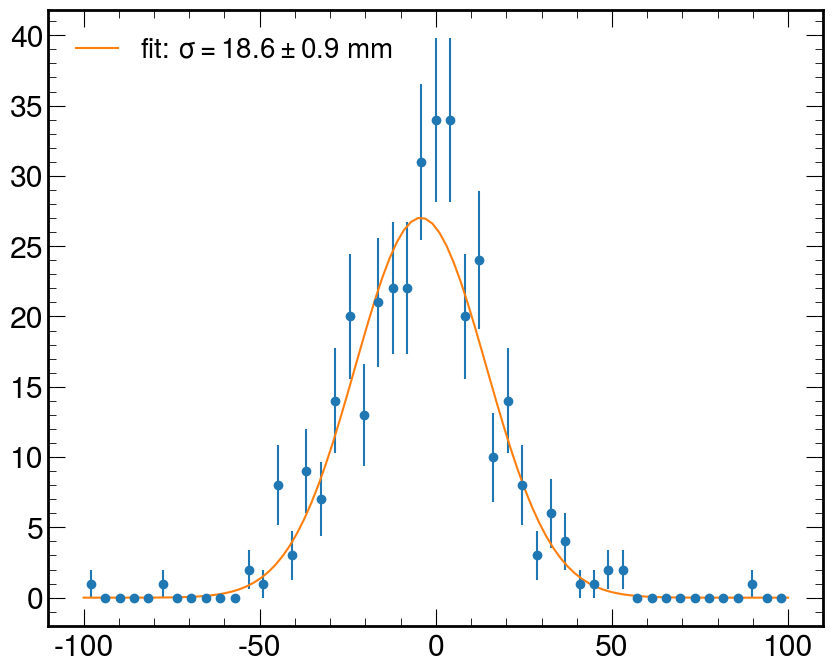

In [167]:
for fname in "dd4hep/zdc_staggered_h4_reco_neutron_10GeV_theta_deg.edm4hep.root.csv",:
    df=pd.read_csv(fname).query("abs(x_truth)<200 and abs(y_truth)<200")
    
    res_plot(df.dr, bins=np.linspace(-100, 100, 50))
    #res_plot(df.dr_rw, bins=np.linspace(-100, 100, 50))
    

In [63]:
20*np.exp(-4.5), 90*np.exp(-5.5), 290*np.exp(-6.5)

(0.22217993076484613, 0.367809429461766, 0.435997365963496)

['dd4hep/pkl/truth_xy_w0_range_500.pkl', 'dd4hep/pkl/truth_xy_w0_range_3000.pkl', 'dd4hep/pkl/truth_xy_w0_range_1000.pkl', 'dd4hep/pkl/truth_xy_w0_range_1500.pkl', 'dd4hep/pkl/truth_xy_w0_range_3500.pkl', 'dd4hep/pkl/truth_xy_w0_range_2000.pkl', 'dd4hep/pkl/truth_xy_w0_range_0.pkl', 'dd4hep/pkl/truth_xy_w0_range_4500.pkl', 'dd4hep/pkl/truth_xy_w0_range_4000.pkl', 'dd4hep/pkl/truth_xy_w0_range_2500.pkl']


(array([ 1.,  6., 20.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-25.27536833, -13.1165977 ,  -0.95782707,  11.20094356,
         23.35971419,  35.51848483,  47.67725546,  59.83602609,
         71.99479672,  84.15356735,  96.31233798]),
 <BarContainer object of 10 artists>)

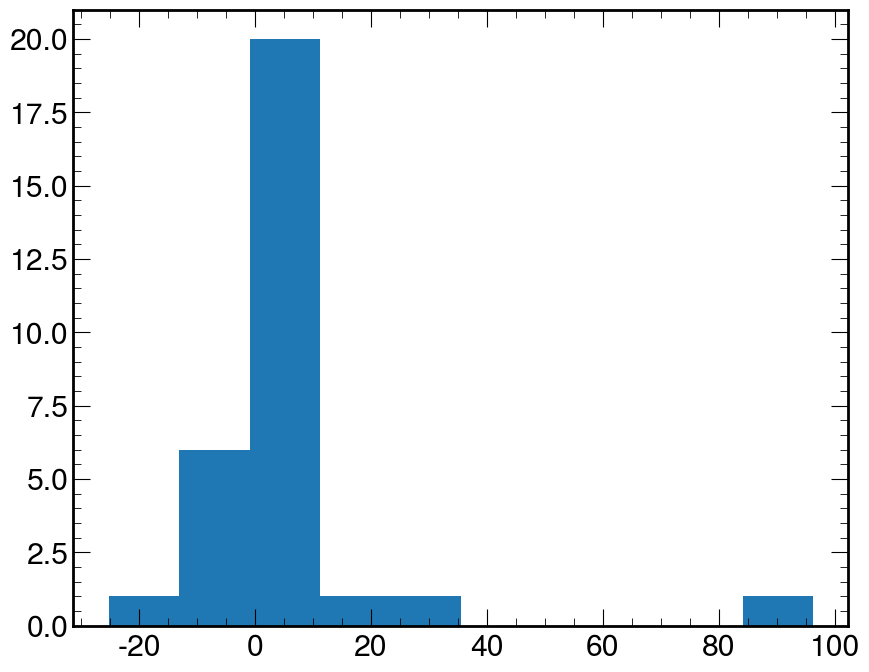

In [82]:
path=f"dd4hep/pkl/truth_xy_w0_range_[0-9]*.pkl"
files=glob.glob(path)
print(files)
df = pd.concat(map(pd.read_pickle, files))
plt.hist(df['dy_rw_w0=5.75'])

In [138]:
df = pd.read_csv("dd4hep/test_h4.csv")
res_plot(df.dr_rw,bins=4)

TypeError: `bins` must be an integer, a string, or an array